# 3. Asking meaningful question

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = './Data/CarInformation.csv'
df = pd.read_csv(data_path)

| **Question**                                                | **Meaning of the Question**                                                |
|-------------------------------------------------------------|---------------------------------------------------------------------------|
| Which car is the most ideal?                                | Identify the relationships affecting the car's speed to choose the most ideal car. |
| How have production trends changed? Analyze these trends.    | Analyze the changes in car production trends over time.                   |
| Which origin is ideal for buying a car by mpg?                     | Identify the origin where car manufacturers have made the most improvements to buy durable and long-lasting cars by mpg. |



## 3.1. Question 1: Which car is the most ideal? 

Nowadays, young people are passionate about speed. Therefore, as part of the younger generation, we will focus on relationships surrounding speed to evaluate the vehicles. Here, we will examine which columns influence the speed column by using the correlation between them.

First, we will use the `corr` function to understand the relationships between them.

In [3]:
correlation_matrix = df[['weight', 'acceleration', 'mpg', 'horsepower']].corr()
print("Correlation coefficient:")
print(correlation_matrix)

Correlation coefficient:
                weight  acceleration       mpg  horsepower
weight        1.000000     -0.417457 -0.831741    0.864538
acceleration -0.417457      1.000000  0.420289   -0.689196
mpg          -0.831741      0.420289  1.000000   -0.778427
horsepower    0.864538     -0.689196 -0.778427    1.000000


After that, we will normalize the data to make it easier to calculate scores.

In [4]:
mpg = df['mpg']
mpg_norm = (mpg - mpg.min()) / (mpg.max() - mpg.min())

weight = df['weight']
weight_norm = (weight - weight.min()) / (weight.max() - weight.min())

acceleration = df['acceleration']
acceleration_norm = (acceleration - acceleration.min()) / (acceleration.max() - acceleration.min())

horsepower = df['horsepower']
horsepower_norm = (horsepower - horsepower.min()) / (horsepower.max() - horsepower.min())

Next, we will filter out the cars with the highest scores.

In [5]:
score = mpg_norm - weight_norm + acceleration_norm - horsepower_norm
df['score'] = score
score = score.sort_values(ascending=False)
df.loc[score.nlargest(10).index].reset_index(drop = True)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,score
0,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,1.739754
1,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe,1.633841
2,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe,1.609612
3,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,78,europe,1.594145
4,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan,1.345112
5,datsun 210,40.8,4,85.0,65.0,2110,19.2,80,japan,1.268238
6,toyota corolla tercel,38.1,4,89.0,60.0,1968,18.8,80,japan,1.240054
7,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,76,usa,1.224896
8,toyota starlet,39.1,4,79.0,58.0,1755,16.9,81,japan,1.224816
9,renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,77,europe,1.223712


- Top Performers: The top-scoring vehicles are the VW Pickup (1.739754) and VW Dasher (Diesel) (1.633841). This implies that these vehicles have a combination of attributes that contribute to a high score.

- Origin and Score: It appears that European and Japanese vehicles tend to have higher scores compared to American vehicles. This could suggest that fuel efficiency and other factors considered in the scoring metric are generally better in these regions.  

## 3.2. Question 2: How have production trends changed over time?

 We will explore how production trends have shifted and analyze these trends in detail.

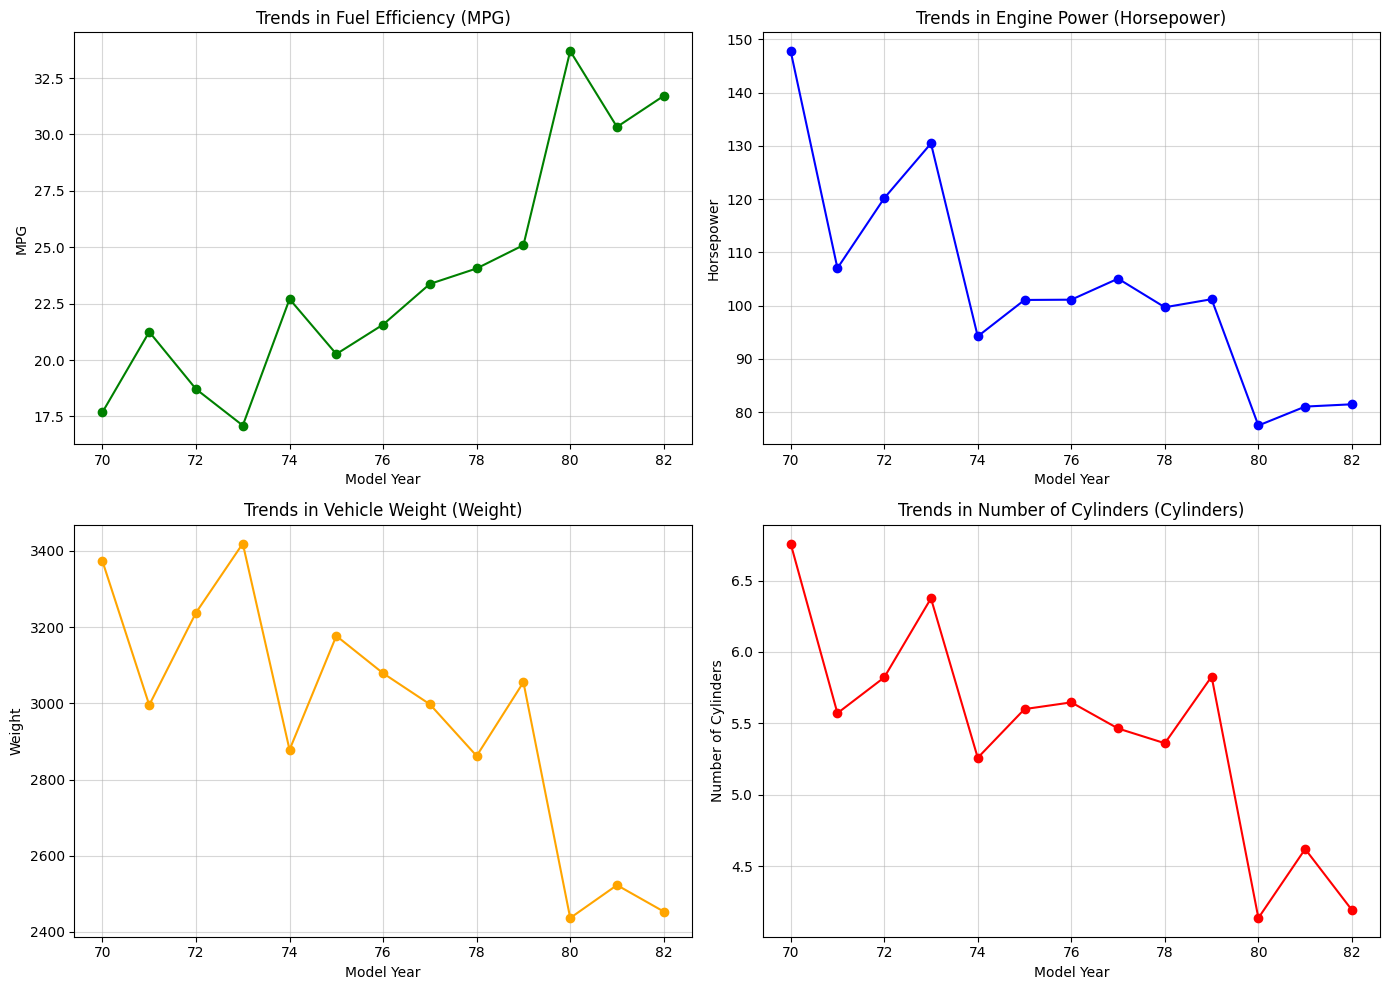

In [6]:
trends = df.groupby('model_year')[['mpg', 'horsepower', 'weight', 'cylinders']].mean()
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
trends['mpg'].plot(marker='o', color='green')
plt.title('Trends in Fuel Efficiency (MPG)')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 2)
trends['horsepower'].plot(marker='o', color='blue')
plt.title('Trends in Engine Power (Horsepower)')
plt.xlabel('Model Year')
plt.ylabel('Horsepower')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 3)
trends['weight'].plot(marker='o', color='orange')
plt.title('Trends in Vehicle Weight (Weight)')
plt.xlabel('Model Year')
plt.ylabel('Weight')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 4)
trends['cylinders'].plot(marker='o', color='red')
plt.title('Trends in Number of Cylinders (Cylinders)')
plt.xlabel('Model Year')
plt.ylabel('Number of Cylinders')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

From the charts above, we can see that fuel efficiency has become increasingly important over time. Therefore, we will analyze this attribute in detail.

We will investigate how other attributes influence this attribute.

In [7]:
maxtrix_corr = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']].corr()
maxtrix_corr['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64

Next, we will visualize the data to clearly see the relationships between these attributes.

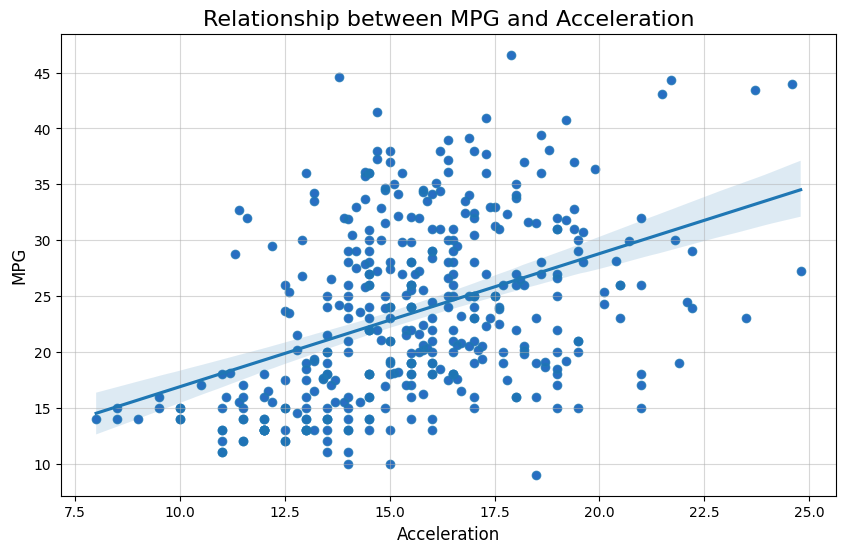

Average MPG by acceleration groups:
acceleration_bins
(7.983, 11.36]    15.185714
(11.36, 14.72]    20.899265
(14.72, 18.08]    25.363372
(18.08, 21.44]    25.581034
(21.44, 24.8]     31.945455
Name: mpg, dtype: float64


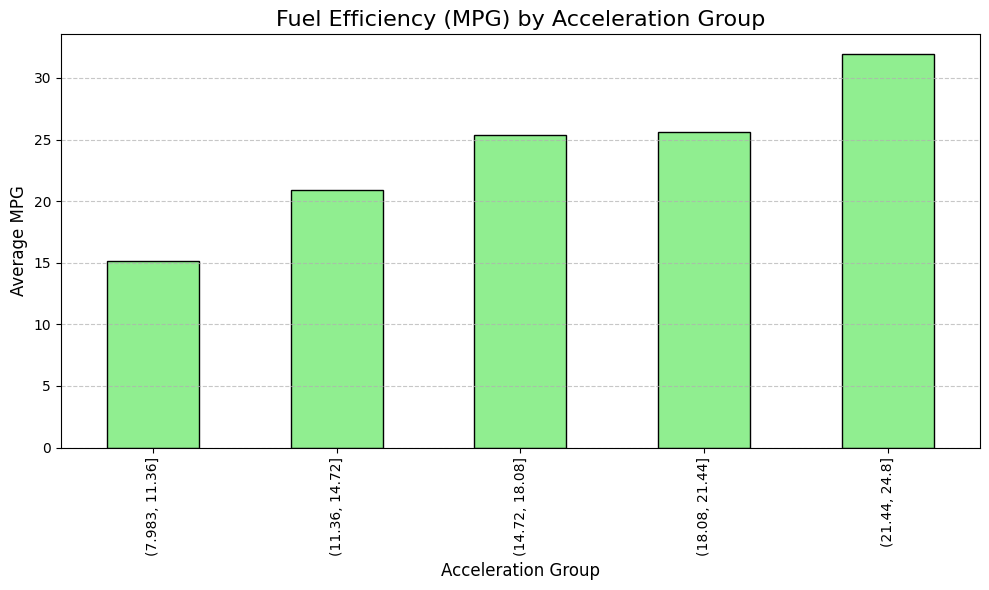

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceleration', y='mpg', color='blue', alpha=0.7)
sns.regplot(data=df, x='acceleration', y='mpg')
plt.title('Relationship between MPG and Acceleration', fontsize=16)
plt.xlabel('Acceleration', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

df['acceleration_bins'] = pd.cut(df['acceleration'], bins=5)

mpg_by_accel = df.groupby('acceleration_bins', observed=True)['mpg'].mean()
print("Average MPG by acceleration groups:")
print(mpg_by_accel)

mpg_by_accel.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(10, 6))
plt.title('Fuel Efficiency (MPG) by Acceleration Group', fontsize=16)
plt.xlabel('Acceleration Group', fontsize=12)
plt.ylabel('Average MPG', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. **Upward trend**: Average fuel efficiency (MPG) tends to increase as the acceleration group increases. This indicates that vehicles with higher acceleration tend to be more fuel-efficient.

2. **Value gaps between groups**:  
   - The group with the lowest acceleration range (7.983, 11.36] has the lowest fuel efficiency, approximately 15 MPG.  
   - Fuel efficiency steadily increases in the subsequent groups, with the last group (21.44, 24.8] achieving over 30 MPG, the highest among all groups.

3. **Implications**:   
- Vehicles with longer acceleration times tend to have more stable speeds, which can result in better fuel efficiency. When a vehicle takes more time to reach its maximum speed, the engine operates in a more stable state rather than producing sudden bursts of acceleration.

- This stability not only reduces energy consumption but also optimizes the engine's performance. Rapid acceleration often forces the engine to operate at maximum capacity for short periods, consuming more fuel. Conversely, gradual acceleration allows energy to be used more efficiently, helping to save fuel and reduce emissions.

- Additionally, vehicles with longer acceleration times are often designed to operate at moderate performance levels, focusing on durability and energy efficiency rather than power or maximum speed.
